In [9]:
!pip install inflect

In [1]:
import nltk
import re, string, unicodedata
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import math

#  Limpieza de caracteres

In [2]:
def CleanWOrds(words,user,Clean_Words):
   
    def remove_non_ascii(words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in stopwords.words('spanish'):
                new_words.append(word)
        return new_words

    def stem_words(words):
        """Stem words in list of tokenized words"""
        stemmer = LancasterStemmer()
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def normalize(words):
        words = remove_non_ascii(words)
        words = to_lowercase(words)
        words = remove_punctuation(words)
        words = replace_numbers(words)
        words = remove_stopwords(words)
        return words

    words = normalize(words)
    #print(words)
    #print (user,"\n",words)
    
    Clean_Words=Clean_Words.append(words)
    return (words,user,Clean_Words)


In [3]:
# !pip install gzip
# !pip install gensim
# !pip install logging
# !pip install zipfile

In [4]:
# imports needed and set up logging
import gzip
import gensim 
import logging
import zipfile
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

/home/jecs89/anaconda3/envs/test/lib/python3.7/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [5]:
STWRD=['anos','ello','deben','jr','merced','urb','torre','falta','partido','politica','nivel','ademas','gob','pe','asi','nacional','politica','peruano','debe','pais','peru','sua','llulla','plan','gobierno','ama','quella','mas','ano','un','una','unas','unos','uno','sobre','todo','tambien','tras','otro','algun','alguno','alguna','algunos','algunas','ser','es','soy','eres','somos','sois','estoy','esta','estamos','estais','estan','como','en','para','atras','porque','por que','estado','estaba','ante','antes','siendo','ambos','pero','por','poder','puede','puedo','podemos','podeis','pueden','fui','fue','fuimos','fueron','hacer','hago','hace','hacemos','haceis','hacen','cada','fin','incluso','primero','desde','conseguir','consigo','consigue','consigues','conseguimos','consiguen','ir','voy','va','vamos','vais','van','vaya','gueno','ha','tener','tengo','tiene','tenemos','teneis','tienen','el','la','lo','las','los','su','aqui','mio','tuyo','ellos','ellas','nos','nosotros','vosotros','vosotras','si','dentro','solo','solamente','saber','sabes','sabe','sabemos','sabeis','saben','ultimo','largo','bastante','haces','muchos','aquellos','aquellas','sus','entonces','tiempo','verdad','verdadero','verdadera','cierto','ciertos','cierta','ciertas','intentar','intento','intenta','intentas','intentamos','intentais','intentan','dos','bajo','arriba','encima','usar','uso','usas','usa','usamos','usais','usan','emplear','empleo','empleas','emplean','ampleamos','empleais','valor','muy','era','eras','eramos','eran','modo','bien','cual','cuando','donde','mientras','quien','con','entre','sin','trabajo','trabajar','trabajas','trabaja','trabajamos','trabajais','trabajan','podria','podrias','podriamos','podrian','podriais','yo','aquel']

In [6]:

def setup(data_file):
    def read_input(input_file):
        """This method reads the input file which is in gzip format"""

        logging.info("reading file {0}...this may take a while".format(input_file))

        with open (input_file, 'rb') as f:
            for i, line in enumerate (f): 

                if (i%10000==0):
                    logging.info ("read {0} reviews".format (i))
                # hacer un preprocesamiento y devolver una lista de palabras para cada texto de revisión
                yield gensim.utils.simple_preprocess (line)

    # leyó las críticas tokenizadas en una lista
    # cada elemento de la revisión se convierte en una serie de palabras
    # entonces esto se convierte en una lista de listas
    documents = list (read_input (data_file))
    logging.info ("Done reading data file") 

    g=[]
    for h in documents:
        for s in h:
            g.append(s)
    #print(g)
    TextPlan2030 = " ".join([str(k) for k in g])
    #print(TextPlan2030)

    user=0
    Clean_Words=[]

    UserList=[]
    data = "".join(TextPlan2030)
    words = nltk.word_tokenize(data)
    CleanWOrds(words,user,Clean_Words)

    g=[]
    v=0
    for h in Clean_Words:
        for s in h:
            for z in STWRD:
                if s==z:
                    v=v+1
            if v==0:
                g.append(s)
            v=0
                    #print(g)
    #print(g)

    Plan_CP = " ".join([str(k) for k in g])

    #print(TextPlan2030)
    return (Plan_CP)

# Lectura de datos (planes de gobierno)

In [7]:

data_file="accion_pupular.txt"
accion_pupular_text=setup(data_file)

data_file="Partido_Morado.txt"
Partido_Morado_text=setup(data_file)

data_file="Partido_Avanza_Pais.txt"
Partido_Avanza_Pais_text=setup(data_file)

data_file="Alianza_Progreso.txt"
Alianza_Progreso_text=setup(data_file)

data_file="APRA.txt"
APRA_text=setup(data_file)

data_file="Democracia_directa.txt"
Democracia_directa_text=setup(data_file)

data_file="Frente_amplio.txt"
Frente_amplio_text=setup(data_file)

data_file="Frente_esperanza.txt"
Frente_esperanza_text=setup(data_file)

data_file="Fuerza_popular.txt"
Fuerza_popular_text=setup(data_file)

data_file="Juntos_peru.txt"
Juntos_peru_text=setup(data_file)

data_file="Partido_nacionalista.txt"
Partido_nacionalista_text=setup(data_file)

data_file="Peru_libre.txt"
Peru_libre_text=setup(data_file)

data_file="Patria_segura.txt"
Patria_segura_text=setup(data_file)

data_file="Podemos.txt"
Podemos_text=setup(data_file)

data_file="PPC.txt"
PPC_text=setup(data_file)

data_file="Renovacion_pupular.txt"
Renovacion_pupular_text=setup(data_file)

data_file="Somos_peru.txt"
Somos_peru_text=setup(data_file)

data_file="Union_peru.txt"
Union_peru_text=setup(data_file)

data_file="Victoria_nacional.txt"
Victoria_nacional_text=setup(data_file)





2021-03-29 13:36:41,081 : INFO : reading file accion_pupular.txt...this may take a while
2021-03-29 13:36:41,082 : INFO : read 0 reviews
2021-03-29 13:36:41,103 : INFO : Done reading data file
2021-03-29 13:36:42,407 : INFO : reading file Partido_Morado.txt...this may take a while
2021-03-29 13:36:42,408 : INFO : read 0 reviews
2021-03-29 13:36:42,471 : INFO : Done reading data file
2021-03-29 13:36:47,914 : INFO : reading file Partido_Avanza_Pais.txt...this may take a while
2021-03-29 13:36:47,915 : INFO : read 0 reviews
2021-03-29 13:36:47,922 : INFO : Done reading data file
2021-03-29 13:36:48,616 : INFO : reading file Alianza_Progreso.txt...this may take a while
2021-03-29 13:36:48,618 : INFO : read 0 reviews
2021-03-29 13:36:48,704 : INFO : Done reading data file
2021-03-29 13:36:58,184 : INFO : reading file APRA.txt...this may take a while
2021-03-29 13:36:58,185 : INFO : read 0 reviews
2021-03-29 13:36:58,202 : INFO : Done reading data file
2021-03-29 13:36:59,614 : INFO : readi

In [12]:
Corpus=[]
Corpus.append([accion_pupular_text])
Corpus.append([Partido_Morado_text])
Corpus.append([Partido_Avanza_Pais_text])
Corpus.append([Alianza_Progreso_text])
Corpus.append([APRA_text])
Corpus.append([Democracia_directa_text])
Corpus.append([Frente_amplio_text])
Corpus.append([Frente_esperanza_text])
Corpus.append([Fuerza_popular_text])
Corpus.append([Juntos_peru_text])
Corpus.append([Partido_nacionalista_text])
Corpus.append([Peru_libre_text])
Corpus.append([Patria_segura_text])
Corpus.append([Podemos_text])
Corpus.append([PPC_text])
Corpus.append([Renovacion_pupular_text])
Corpus.append([Somos_peru_text])
Corpus.append([Union_peru_text])
Corpus.append([Victoria_nacional_text])

In [14]:
import pickle

filename = 'corpus_processed'
print(filename)
outfile = open(filename,'wb')
pickle.dump(Corpus,outfile)
outfile.close()

corpus_processed


In [15]:
NombreP=['Accion Popular','Partido Morado','Avanza Pais','Alianza para el Progreso'
,'APRA','Democracia Directa','Frente Amplio','Frente Esperanza','Fuerza Popular','Juntos por el Peru',
'Partido Nacionalista','Peru Libre','Patria Segura','Podemos Peru','PPC','Renovavion Popular','Somos Peru','Union por el Peru','Victoria Nacional'
]


# Ploteo de planes de gobierno de candidatos

In [9]:
def ploteo(Text_P,i,NombreP, gs, index):
    original_wc = cloud = WordCloud(width = 812, height = 512, background_color='white', stopwords=STOPWORDS).generate(Text_P)
#     fig.add_subplot(4, 4, i + 1)
    plt.subplot(gs[index])
    plt.imshow(original_wc, interpolation='bilinear', alpha=1)
    plt.axis("off")
    plt.title(NombreP)

In [81]:
    import pandas as pd
    data = pd.DataFrame(Corpus, columns=['Plan'])
    data = pd.concat( [data, pd.DataFrame(NombreP)], axis=1 )
    data.columns = ['Plan', 'Partido']
    
    gobierno = ['gobierno','presidente','gobernador','alcalde','diputado','senador','burocracia','estado','poder legislativo','poder ejecutivo','poder judicial']

    politica = ['votacion','corrupcion','derecho','justicia','fraude','democracia','partido','militante', 'mitin','precampaña','campaña','eleccion','elecciones','candidato','candidatos','oposicion','discurso politico','voto']   

    educacion = ['aprendizaje','profesor','maestro','educacion','enseñanza','academia','estudiante','alumno','ciencia','escuela','universidad','catedra','educacion basica','educacion superior','clase virtual','clase a distancia','tecnologia']

    salud = ['salud','cuarentena','hospital','bienestar','enfermo','saludable','medico','mente','ansiedad','panico','depresion','cubreboca','mascarilla','contagio','doctor','enfermedad cronica','enfermedad','infeccion respiratoria','neumonia','oxigeno','disnea','victimas','deceso','muerte','discapacidad','bullying','comorbilidad']

    economia = ['economia','finanzas','dinero','moneda','desempleo','ahorro','bolsa','pobreza','patrimonio','intereses','demanda','estafa','fraude','huelga','impuesto','salario','trabajo','despido','trabajo en casa','industria']

    religion = ['religion','creencia','fe','culto','iglesia','cristiano','catolico','sacerdote','pastor','eucaristia','templo','misa','Dios','oracion','rosario','Jehova','biblia','Jesus','Virgen de Guadalupe','semana santa','crucifixion','ayuno']
    
    sizes = []
    for i in range( data.shape[0] ):
        val_partido = []
        partido = data['Plan'].iloc[i]
              
        counter = 0
        for i in range(len(gobierno)):
            if partido.find(gobierno[i]) != -1:
                counter += 1
        val_partido.append(counter)

        counter = 0
        for i in range(len(politica)):
            if partido.find(politica[i]) != -1:
                counter += 1
        val_partido.append(counter)
        
        counter = 0
        for i in range(len(educacion)):
            if partido.find(educacion[i]) != -1:
                counter += 1
        val_partido.append(counter)
        
        counter = 0
        for i in range(len(salud)):
            if partido.find(salud[i]) != -1:
                counter += 1
        val_partido.append(counter)
        
        counter = 0
        for i in range(len(economia)):
            if partido.find(economia[i]) != -1:
                counter += 1
        val_partido.append(counter)
        
        counter = 0
        for i in range(len(religion)):
            if partido.find(religion[i]) != -1:
                counter += 1
        val_partido.append(counter)

        sizes.append(val_partido)

    print( np.array(sizes) )

[[ 3 12  8 11 12  2]
 [ 6 12 12 16 14  7]
 [ 2  6  8  6 11  1]
 [ 8 12 13 11 17  6]
 [ 4 11 10  9 11  5]
 [ 3  9 12 13 10  4]
 [ 5 10 11 11 13  6]
 [ 4  7 11 10 13  6]
 [ 4  9 13 12 12  6]
 [ 4  8 10 11 16  5]
 [ 5 10 10 11 14  7]
 [ 6 12 10 11 17  7]
 [ 4 12 13 14 11 11]
 [ 6  8 12 15 13  5]
 [ 4 11 11 13 16  7]
 [ 3  4  6  6  8  4]
 [ 8 11 13 12 14  6]
 [ 3  6 13 10 10  3]
 [ 4 11 13 16 13  5]]


In [106]:
sizes_corpus = []
for i in Corpus:
    sizes_corpus.append(len(i[0]))
print(sizes_corpus)

norm_freq = []
idx = 0
for f in sizes:
#     print(sizes[int(idx)])
    norm_freq.append( np.array(f) / sizes_corpus[idx] )
    idx += 1
print(norm_freq)

[array([6.55565753e-05, 2.62226301e-04, 1.74817534e-04, 2.40374110e-04,
       2.62226301e-04, 4.37043835e-05]), array([2.58754528e-05, 5.17509056e-05, 5.17509056e-05, 6.90012075e-05,
       6.03760566e-05, 3.01880283e-05]), array([6.78426052e-05, 2.03527815e-04, 2.71370421e-04, 2.03527815e-04,
       3.73134328e-04, 3.39213026e-05]), array([2.09195721e-05, 3.13793581e-05, 3.39943046e-05, 2.87644116e-05,
       4.44540907e-05, 1.56896791e-05]), array([6.12698170e-05, 1.68491997e-04, 1.53174542e-04, 1.37857088e-04,
       1.68491997e-04, 7.65872712e-05]), array([2.77633820e-05, 8.32901459e-05, 1.11053528e-04, 1.20307988e-04,
       9.25446065e-05, 3.70178426e-05]), array([4.28687787e-05, 8.57375573e-05, 9.43113131e-05, 9.43113131e-05,
       1.11458825e-04, 5.14425344e-05]), array([6.03682463e-05, 1.05644431e-04, 1.66012677e-04, 1.50920616e-04,
       1.96196800e-04, 9.05523695e-05]), array([2.88068215e-05, 6.48153483e-05, 9.36221697e-05, 8.64204644e-05,
       8.64204644e-05, 4.3210232

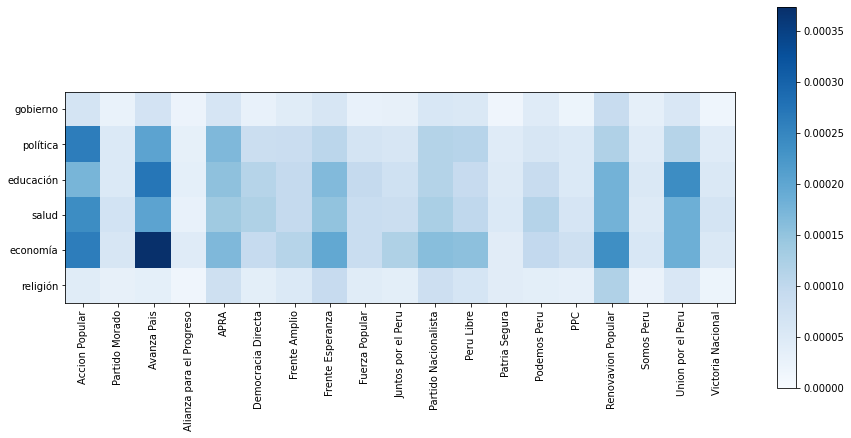

In [109]:
fig = plt.figure(figsize=[15,7])
cmap_ = 'Blues'
areas = ['gobierno', 'política', 'educación', 'salud','economía', 'religión']
# dates = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# plt.subplot(1,2,1)
plt.imshow(np.array(norm_freq).T, cmap=cmap_, vmin=0)
plt.xticks(np.arange(0,len(Corpus)), data['Partido'], rotation=90)#
plt.yticks(np.arange(0,6), areas , rotation=0)
plt.colorbar()
# plt.title('Number of Tweets per category - 2020, Peru')
# plt.text(8,-1.2,'Data: https://www.medrxiv.org/content/10.1101/2020.04.06.20055749v1',ha="center", va="center")
# plt.text(0,-1.2,'created by jecs89')
plt.show()
fig.savefig('color_map_sectores_2020.pdf', bbox_inches = 'tight', pad_inches = 0)

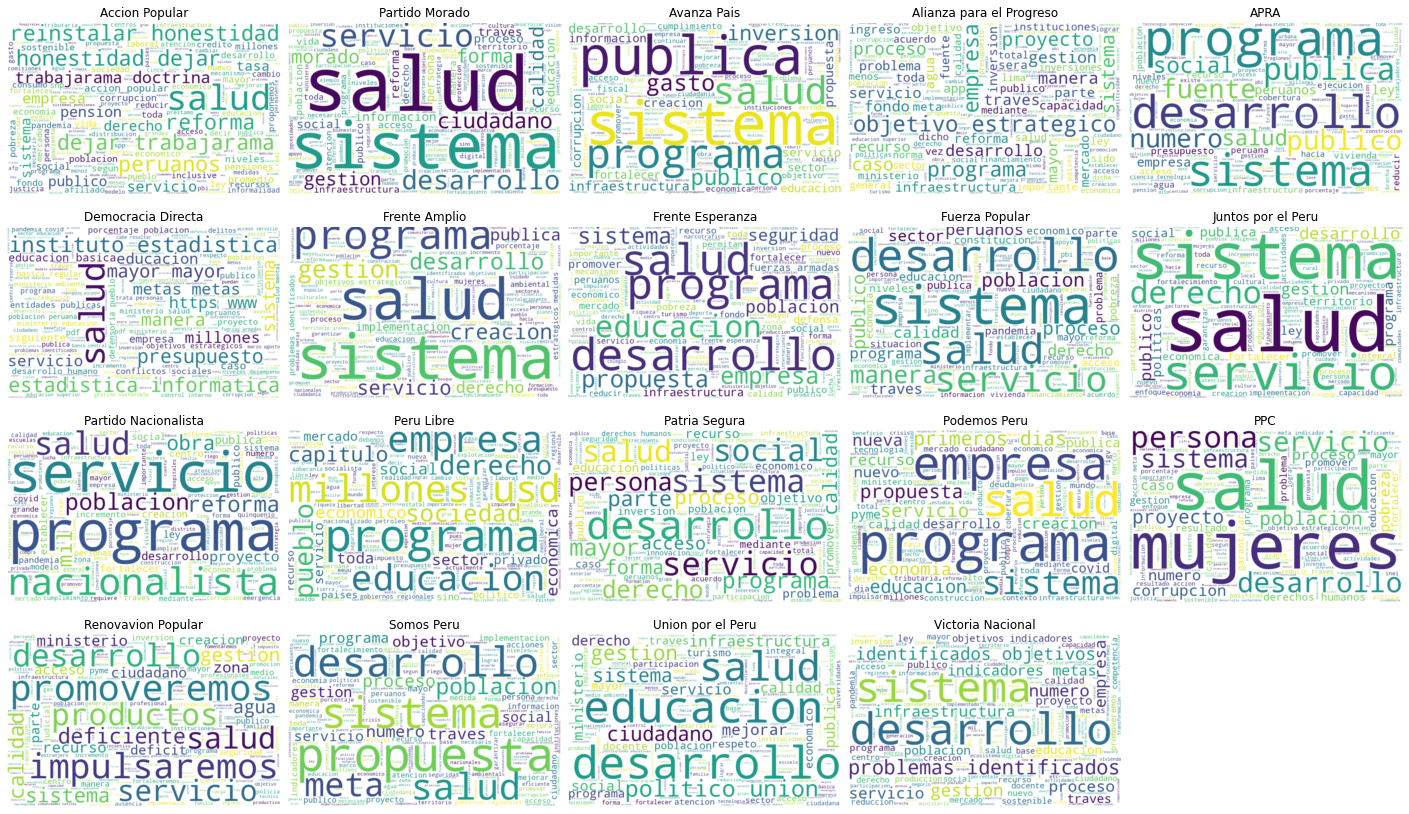

In [108]:
# import wikipedia
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(4, 5)
gs1.update(wspace=0.025, hspace=0.0)

fig = plt.figure(num=12, figsize=(25, 15))
c=0
idx = -1
for i in range(4):
    if i == 1: i = 4
    elif i == 2: i = 8
    #Text = " ".join([str(k) for k in Corpus[4]])
    Text_P=" ".join([str(k) for k in Corpus[c]])
    PLT=ploteo(Text_P,i+0,NombreP=NombreP[c], gs=gs1, index=idx+1 )
    
    Text_P=" ".join([str(k) for k in Corpus[c+1]])
    PLT=ploteo(Text_P,i+1,NombreP=NombreP[c+1], gs=gs1, index=idx+2 )

    Text_P=" ".join([str(k) for k in Corpus[c+2]])
    PLT=ploteo(Text_P,i+2,NombreP=NombreP[c+2], gs=gs1, index=idx+3 )
    
    Text_P=" ".join([str(k) for k in Corpus[c+3]])
    PLT=ploteo(Text_P,i+3,NombreP=NombreP[c+3], gs=gs1, index=idx+4 )
    
    if idx+5 != 19:
        Text_P=" ".join([str(k) for k in Corpus[c+4]])
        PLT=ploteo(Text_P,i+4,NombreP=NombreP[c+4], gs=gs1, index=idx+5 )
    
    c=c+5
    idx += 5
plt.show()

fig.savefig('cw_planes.pdf', bbox_inches = 'tight', pad_inches = 0)

# Jaro Winkler 

In [32]:
# Python3 implementation of above approach 
from math import floor, ceil 
  
# Function to calculate the 
# Jaro Similarity of two s 
def jaro_distance(s1, s2): 
      
    # If the s are equal 
    if (s1 == s2): 
        return 1.0
  
    # Length of two s 
    len1 = len(s1) 
    len2 = len(s2) 
  
    # Maximum distance upto which matching 
    # is allowed 
    max_dist = floor(max(len1, len2) / 2) - 1
  
    # Count of matches 
    match = 0
  
    # Hash for matches 
    hash_s1 = [0] * len(s1) 
    hash_s2 = [0] * len(s2) 
  
    # Traverse through the first 
    for i in range(len1): 
  
        # Check if there is any matches 
        for j in range(max(0, i - max_dist),  
                       min(len2, i + max_dist + 1)): 
              
            # If there is a match 
            if (s1[i] == s2[j] and hash_s2[j] == 0): 
                hash_s1[i] = 1
                hash_s2[j] = 1
                match += 1
                break
  
    # If there is no match 
    if (match == 0): 
        return 0.0
  
    # Number of transpositions 
    t = 0
    point = 0
  
    # Count number of occurances 
    # where two characters match but 
    # there is a third matched character 
    # in between the indices 
    for i in range(len1): 
        if (hash_s1[i]): 
  
            # Find the next matched character 
            # in second 
            while (hash_s2[point] == 0): 
                point += 1
  
            if (s1[i] != s2[point]): 
                point += 1
                t += 1
    t = t//2
  
    # Return the Jaro Similarity 
    return (match/ len1 + match / len2 + 
            (match - t + 1) / match)/ 3.0
  

In [44]:
Corpus[0][0]

'doctrina propuesta accion popular ladron mentiroso ocioso oro pies nunca agache recogerlo fernando belaunde terry reinstalar honestidad dejar trabajarama doctrina presidente belaunde universalizo etica ancestros incas etica hoy siempre ahora nunca etica recuperarla ladron mentiroso ocioso compromiso accion popular acabar corrupcion lleva millonescada reinstaurar valores integridad proactividad gestionpublica corrupcion mayor preocupacion millones peruanos accion popular autoridad moral pristina honradez fernando belaunde manejo cosa publica asume reto rescatar garras corrupcion capturado vergonzosa marca mundial unico seis presidentes republica procesados investigados profugos presos corrupcion derrotamos corrupcion cualquier haga sera ilusorio compromiso accion popular primer lugar devolverle dignidad respeto autoridad credibilidad investidura presidencial devolver confianza pueblo instituciones publicas ap autentico politico unico sustento ideologia inspirada legado historico antigu

In [48]:
corpus = ["I'd like an apple", 
          "An apple a day keeps the doctor away", 
          "Never compare an apple to an orange", 
          "I prefer scikit-learn to Orange", 
          "The scikit-learn docs are Orange and Blue"]                                                                                                                                                                                                   
vect = TfidfVectorizer(min_df=1, stop_words="english")                                                                                                                                                                                                   
tfidf = vect.fit_transform(corpus)                                                                                                                                                                                                                       
pairwise_similarity = tfidf * tfidf.T 

In [47]:
pairwise_similarity.toarray()

array([[1.        , 0.17668795, 0.27056873, 0.        , 0.        ],
       [0.17668795, 1.        , 0.15439436, 0.        , 0.        ],
       [0.27056873, 0.15439436, 1.        , 0.19635649, 0.16815247],
       [0.        , 0.        , 0.19635649, 1.        , 0.54499756],
       [0.        , 0.        , 0.16815247, 0.54499756, 1.        ]])

In [31]:
c=0
cadena=[]
for p in Corpus:
    #for i in p:
    x=0
    for case in CP:
            #for j in case:
            s1 = p
            s2 = case
            #print(s1)
            #print(s2)
            # Prjaro Similarity of two s 
            d=round(jaro_distance(s1, s2),6)
            cadena.append(NombreP[c])
            cadena.append(NombreP[x])
            cadena.append(d)
            #print(cadena)
            #print(NombreP[c]," con ",NombreP[x], " similitud ", d)
            x=x+1
    c=c+1
print(cadena)

['Accion Popular', 'Accion Popular', 1.0, 'Accion Popular', 'Partido Morado', 0.0, 'Accion Popular', 'Avanza Pais', 0.0, 'Accion Popular', 'Alianza para el Progreso', 0.0, 'Accion Popular', 'APRA', 0.0, 'Accion Popular', 'Democracia Directa', 0.0, 'Accion Popular', 'Frente Amplio', 0.0, 'Accion Popular', 'Frente Esperanza', 0.0, 'Accion Popular', 'Fuerza Popular', 0.0, 'Accion Popular', 'Juntos por el Peru', 0.0, 'Accion Popular', 'Partido Nacionalista', 0.0, 'Accion Popular', 'Peru Libre', 0.0, 'Accion Popular', 'Patria Segura', 0.0, 'Accion Popular', 'Podemos Peru', 0.0, 'Accion Popular', 'PPC', 0.0, 'Accion Popular', 'Renovavion Popular', 0.0, 'Accion Popular', 'Somos Peru', 0.0, 'Accion Popular', 'Union por el Peru', 0.0, 'Accion Popular', 'Victoria Nacional', 0.0, 'Partido Morado', 'Accion Popular', 0.0, 'Partido Morado', 'Partido Morado', 1.0, 'Partido Morado', 'Avanza Pais', 0.0, 'Partido Morado', 'Alianza para el Progreso', 0.0, 'Partido Morado', 'APRA', 0.0, 'Partido Morado', 

# Exportacion de datos

In [19]:
import csv
with open('JaroW.csv', 'w') as csvfile:
    fieldnames = ['Id_PG1','Id_PG2','JaroW_Dictance']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    word=0
    for i in range(int(len(cadena)/3)):
        
        #for j in range(int(len(i)/3)):
        Id_Cv1=cadena[word]
        print(Id_Cv1)
        Id_Cv2=cadena[word+1]
        print(Id_Cv2)
        Rating_general=cadena[word+2]
        print(Rating_general)
        writer.writerow({'Id_PG1': Id_Cv1,
                         'Id_PG2':Id_Cv2,
                         'JaroW_Dictance':Rating_general })
        cont=word+2
        word=cont+1

Accion Popular
Accion Popular
1.0
Accion Popular
Partido Morado
0.0
Accion Popular
Avanza Pais
0.0
Accion Popular
Alianza para el Progreso
0.0
Accion Popular
APRA
0.0
Accion Popular
Democracia Directa
0.0
Accion Popular
Frente Amplio
0.0
Accion Popular
Frente Esperanza
0.0
Accion Popular
Fuerza Popular
0.0
Accion Popular
Juntos por el Peru
0.0
Accion Popular
Partido Nacionalista
0.0
Accion Popular
Peru Libre
0.0
Accion Popular
Patria Segura
0.0
Accion Popular
Podemos Peru
0.0
Accion Popular
PPC
0.0
Accion Popular
Renovavion Popular
0.0
Accion Popular
Somos Peru
0.0
Accion Popular
Union por el Peru
0.0
Accion Popular
Victoria Nacional
0.0
Partido Morado
Accion Popular
0.0
Partido Morado
Partido Morado
1.0
Partido Morado
Avanza Pais
0.0
Partido Morado
Alianza para el Progreso
0.0
Partido Morado
APRA
0.0
Partido Morado
Democracia Directa
0.0
Partido Morado
Frente Amplio
0.0
Partido Morado
Frente Esperanza
0.0
Partido Morado
Fuerza Popular
0.0
Partido Morado
Juntos por el Peru
0.0
Partido 

In [20]:
# imports needed and set up logging
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import zipfile

data_file="plan2030.txt"

with open ('plan2030.txt', 'rb') as f:
    for i,line in enumerate (f):
        Data=line
        print(line)

b"Informe especial: Los Objetivos de Desarrollo Sostenible de la Agenda 2030 y los Planes de Gobierno', 'Pr\xc3\xb3logoLos 17 Objetivos de Desarrollo Sostenible (ODS) son parte de la Agenda 2030, un ambicioso plan de acci\xc3\xb3n para la humanidad que fue aprobado por 193 pa\xc3\xadses en 2015. Casi seis a\xc3\xb1os despu\xc3\xa9s, y en vista de los duros impactos sanitarios y socioecon\xc3\xb3micos de la pandemia por COVID-19, es entendible que muchos se pregunten si sigue siendo relevante un plan que buscaba nada menos que transformar al mundo hacia el esta crisis global, los ODS y sus metas podr\xc3\xadan estar demasiado lejos de nuestro alcance.Sin embargo, todos los organismos que integran el Sistema de Naciones Unidas consideramos hoy que acelerar los avances en la Agenda 2030 es m\xc3\xa1s relevante que nunca para recuperarnos y para construir un mundo mejor. Ante todo, porque nos proporciona la visi\xc3\xb3n de futuro y la hoja de ruta hacia el desarrollo sostenible m\xc3\xa1s

In [21]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with open (input_file, 'rb') as f:
        for i, line in enumerate (f): 

            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # hacer un preprocesamiento y devolver una lista de palabras para cada texto de revisión
            yield gensim.utils.simple_preprocess (line)

# leyó las críticas tokenizadas en una lista
# cada elemento de la revisión se convierte en una serie de palabras
# entonces esto se convierte en una lista de listas
documents = list (read_input (data_file))
logging.info ("Done reading data file") 

g=[]
for h in documents:
    for s in h:
        g.append(s)
#print(g)
TextPlan2030 = " ".join([str(k) for k in g])
#print(TextPlan2030)

user=0
Clean_Words=[]

UserList=[]
data = ''.join(TextPlan2030)
words = nltk.word_tokenize(data)
CleanWOrds(words,user,Clean_Words)

g=[]
for h in Clean_Words:
    for s in h:
        g.append(s)
#print(g)

TextPlan2030 = " ".join([str(k) for k in g])
#print(TextPlan2030)


2021-03-29 13:40:12,165 : INFO : reading file plan2030.txt...this may take a while
2021-03-29 13:40:12,167 : INFO : read 0 reviews
2021-03-29 13:40:12,182 : INFO : Done reading data file


In [22]:
TextPlan2030

'informe especial objetivos desarrollo sostenible agenda planes gobierno prologolos objetivos desarrollo sostenible ods parte agenda ambicioso plan accion humanidad aprobado paises casi seis anos despues vista duros impactos sanitarios socioeconomicos pandemia covid entendible pregunten si sigue siendo relevante plan buscaba menos transformar mundo hacia crisis global ods metas podrian demasiado lejos alcance embargo organismos integran sistema naciones unidas consideramos hoy acelerar avances agenda mas relevante nunca recuperarnos construir mundo mejor proporciona vision futuro hoja ruta hacia desarrollo sostenible mas ampliamente compartidas conocido justamente pandemia asimismo mantiene vigente puesto evidencia necesidad abordar problemas estruc turales desigualdades mejor preparados prevenir enfrentar proximos desafios simi prioridades desarrollo alientan inversiones bienes publicos criticos sistemas proteccion social provision servicios salud agua educacion permiten hacer frente 

In [23]:
c=0
cadena2=[]
for p in Corpus:
    #for i in p:
    
    s1 = p
    s2 = TextPlan2030
    #print(s1)
    #print(s2)
    # Prjaro Similarity of two s 
    d=round(jaro_distance(s1, s2),6)
    cadena2.append(NombreP[c])
    cadena2.append("Agenda 2030")
    cadena2.append(d)
    print(NombreP[c]," con ","Agenda 2030", " similitud ", d)
            
    c=c+1

Accion Popular  con  Agenda 2030  similitud  0.0
Partido Morado  con  Agenda 2030  similitud  0.0
Avanza Pais  con  Agenda 2030  similitud  0.0
Alianza para el Progreso  con  Agenda 2030  similitud  0.0
APRA  con  Agenda 2030  similitud  0.0
Democracia Directa  con  Agenda 2030  similitud  0.0
Frente Amplio  con  Agenda 2030  similitud  0.0
Frente Esperanza  con  Agenda 2030  similitud  0.0
Fuerza Popular  con  Agenda 2030  similitud  0.0
Juntos por el Peru  con  Agenda 2030  similitud  0.0
Partido Nacionalista  con  Agenda 2030  similitud  0.0
Peru Libre  con  Agenda 2030  similitud  0.0
Patria Segura  con  Agenda 2030  similitud  0.0
Podemos Peru  con  Agenda 2030  similitud  0.0
PPC  con  Agenda 2030  similitud  0.0
Renovavion Popular  con  Agenda 2030  similitud  0.0
Somos Peru  con  Agenda 2030  similitud  0.0
Union por el Peru  con  Agenda 2030  similitud  0.0
Victoria Nacional  con  Agenda 2030  similitud  0.0


In [24]:
cadena2

['Accion Popular',
 'Agenda 2030',
 0.0,
 'Partido Morado',
 'Agenda 2030',
 0.0,
 'Avanza Pais',
 'Agenda 2030',
 0.0,
 'Alianza para el Progreso',
 'Agenda 2030',
 0.0,
 'APRA',
 'Agenda 2030',
 0.0,
 'Democracia Directa',
 'Agenda 2030',
 0.0,
 'Frente Amplio',
 'Agenda 2030',
 0.0,
 'Frente Esperanza',
 'Agenda 2030',
 0.0,
 'Fuerza Popular',
 'Agenda 2030',
 0.0,
 'Juntos por el Peru',
 'Agenda 2030',
 0.0,
 'Partido Nacionalista',
 'Agenda 2030',
 0.0,
 'Peru Libre',
 'Agenda 2030',
 0.0,
 'Patria Segura',
 'Agenda 2030',
 0.0,
 'Podemos Peru',
 'Agenda 2030',
 0.0,
 'PPC',
 'Agenda 2030',
 0.0,
 'Renovavion Popular',
 'Agenda 2030',
 0.0,
 'Somos Peru',
 'Agenda 2030',
 0.0,
 'Union por el Peru',
 'Agenda 2030',
 0.0,
 'Victoria Nacional',
 'Agenda 2030',
 0.0]

In [25]:
import csv
with open('JaroW_agenda_2030.csv', 'w') as csvfile:
    fieldnames = ['Id_PG1','Id_PG2','JaroW_Dictance']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    word=0
    for i in range(int(len(cadena2)/3)):
        
        #for j in range(int(len(i)/3)):
        Id_Cv1=cadena2[word]
        print(Id_Cv1)
        Id_Cv2=cadena2[word+1]
        print(Id_Cv2)
        Rating_general=cadena2[word+2]
        print(Rating_general)
        writer.writerow({'Id_PG1': Id_Cv1,
                         'Id_PG2':Id_Cv2,
                         'JaroW_Dictance':Rating_general })
        cont=word+2
        word=cont+1

Accion Popular
Agenda 2030
0.0
Partido Morado
Agenda 2030
0.0
Avanza Pais
Agenda 2030
0.0
Alianza para el Progreso
Agenda 2030
0.0
APRA
Agenda 2030
0.0
Democracia Directa
Agenda 2030
0.0
Frente Amplio
Agenda 2030
0.0
Frente Esperanza
Agenda 2030
0.0
Fuerza Popular
Agenda 2030
0.0
Juntos por el Peru
Agenda 2030
0.0
Partido Nacionalista
Agenda 2030
0.0
Peru Libre
Agenda 2030
0.0
Patria Segura
Agenda 2030
0.0
Podemos Peru
Agenda 2030
0.0
PPC
Agenda 2030
0.0
Renovavion Popular
Agenda 2030
0.0
Somos Peru
Agenda 2030
0.0
Union por el Peru
Agenda 2030
0.0
Victoria Nacional
Agenda 2030
0.0


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("JaroW.csv") 
df

,Id_PG1,Id_PG2,JaroW_Dictance
0,Accion Popular,Accion Popular,1.000000
1,Accion Popular,Partido Morado,0.575843
2,Accion Popular,Avanza Pais,0.724887
3,Accion Popular,Alianza para el Progreso,0.550050
4,Accion Popular,APRA,0.743515
...,...,...,...
356,Victoria Nacional,PPC,0.794257
357,Victoria Nacional,Renovavion Popular,0.556322
358,Victoria Nacional,Somos Peru,0.835658
359,Victoria Nacional,Union por el Peru,0.583906


In [50]:
ratings_df = pd.DataFrame(df, columns = ['Id_PG1', 'Id_PG2', 'JaroW_Dictance'])
ratings_df.head()

,Id_PG1,Id_PG2,JaroW_Dictance
0,Accion Popular,Accion Popular,1.000000
1,Accion Popular,Partido Morado,0.575843
2,Accion Popular,Avanza Pais,0.724887
3,Accion Popular,Alianza para el Progreso,0.550050
4,Accion Popular,APRA,0.743515


In [51]:
R_df = ratings_df.pivot(
    index = 'Id_PG1', columns ='Id_PG2', values = 'JaroW_Dictance').fillna(0)
R_df.head(10)

Id_PG2,APRA,Accion Popular,Alianza para el Progreso,Avanza Pais,Democracia Directa,Frente Amplio,Frente Esperanza,Fuerza Popular,Juntos por el Peru,PPC,Partido Morado,Partido Nacionalista,Patria Segura,Peru Libre,Podemos Peru,Renovavion Popular,Somos Peru,Union por el Peru,Victoria Nacional
Id_PG1,,,,,,,,,,,,,,,,,,,
APRA,1.000000,0.743770,0.566984,0.660323,0.711576,0.696604,0.831361,0.666722,0.674187,0.613246,0.604172,0.758998,0.591676,0.709032,0.673281,0.682064,0.598484,0.786360,0.598870
Accion Popular,0.743515,1.000000,0.550050,0.724887,0.651307,0.640843,0.739887,0.620264,0.625261,0.582629,0.575843,0.684624,0.567246,0.649489,0.624812,0.755441,0.572165,0.789765,0.572602
Alianza para el Progreso,0.566805,0.549991,1.000000,0.536047,0.603602,0.611852,0.567705,0.631244,0.625588,0.693535,0.712359,0.586673,0.742870,0.605776,0.626597,0.539594,0.724720,0.557433,0.723749
Avanza Pais,0.660560,0.724694,0.535595,1.000000,0.601018,0.594782,0.658458,0.581051,0.584500,0.556861,0.552695,0.623063,0.546796,0.600098,0.584020,0.800662,0.550137,0.691455,0.550086
Democracia Directa,0.711821,0.651511,0.603757,0.600973,1.000000,0.815454,0.714469,0.768365,0.780910,0.680332,0.664280,0.778888,0.644420,0.822163,0.778853,0.614267,0.655445,0.677059,0.656114
Frente Amplio,0.696645,0.641186,0.611792,0.594295,0.816016,1.000000,0.699283,0.789953,0.803288,0.695000,0.677836,0.759606,0.655826,0.819037,0.801600,0.606533,0.668095,0.665360,0.668787
Frente Esperanza,0.831434,0.739909,0.568002,0.658357,0.714600,0.699238,1.000000,0.669266,0.676780,0.614961,0.605327,0.762594,0.592697,0.711449,0.675673,0.679520,0.599869,0.782744,0.600295
Fuerza Popular,0.666712,0.619878,0.631155,0.580971,0.768328,0.790133,0.669337,1.000000,0.823735,0.730129,0.709458,0.719672,0.683535,0.772573,0.828869,0.591712,0.698165,0.640457,0.698916
Juntos por el Peru,0.674764,0.625582,0.625759,0.584433,0.781083,0.803365,0.676961,0.823910,1.000000,0.719624,0.700139,0.730363,0.675225,0.785098,0.829875,0.595089,0.689463,0.646493,0.689993


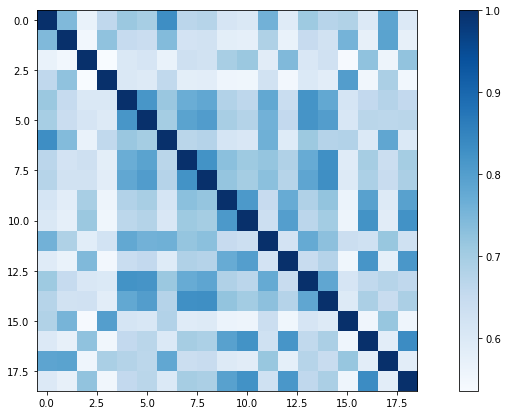

In [63]:
fig = plt.figure(figsize=[15,7])
cmap_ = 'Blues'
plt.imshow(R_df.values, cmap=cmap_)
plt.colorbar()
plt.show()
fig.savefig('sim_planes.pdf', bbox_inches = 'tight', pad_inches = 0)

In [58]:
by_year = R_df.sort_values('Accion Popular',ascending=False)
by_year.head()

Id_PG2,APRA,Accion Popular,Alianza para el Progreso,Avanza Pais,Democracia Directa,Frente Amplio,Frente Esperanza,Fuerza Popular,Juntos por el Peru,PPC,Partido Morado,Partido Nacionalista,Patria Segura,Peru Libre,Podemos Peru,Renovavion Popular,Somos Peru,Union por el Peru,Victoria Nacional
Id_PG1,,,,,,,,,,,,,,,,,,,
Accion Popular,0.743515,1.000000,0.550050,0.724887,0.651307,0.640843,0.739887,0.620264,0.625261,0.582629,0.575843,0.684624,0.567246,0.649489,0.624812,0.755441,0.572165,0.789765,0.572602
Union por el Peru,0.786507,0.789707,0.557285,0.691681,0.677552,0.664935,0.782294,0.639866,0.646339,0.595754,0.588153,0.716626,0.577446,0.675052,0.645532,0.717805,0.583517,1.000000,0.583819
Renovavion Popular,0.682282,0.754927,0.539831,0.800367,0.614662,0.606454,0.679540,0.591208,0.595237,0.563590,0.558077,0.638696,0.552510,0.612656,0.594125,1.000000,0.555488,0.717776,0.555610
APRA,1.000000,0.743770,0.566984,0.660323,0.711576,0.696604,0.831361,0.666722,0.674187,0.613246,0.604172,0.758998,0.591676,0.709032,0.673281,0.682064,0.598484,0.786360,0.598870
Frente Esperanza,0.831434,0.739909,0.568002,0.658357,0.714600,0.699238,1.000000,0.669266,0.676780,0.614961,0.605327,0.762594,0.592697,0.711449,0.675673,0.679520,0.599869,0.782744,0.600295


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("JaroW_agenda_2030.csv") 
df

,Id_PG1,Id_PG2,JaroW_Dictance
0,Accion Popular,Agenda 2030,0.727539
1,Partido Morado,Agenda 2030,0.553402
2,Avanza Pais,Agenda 2030,0.805236
3,Alianza para el Progreso,Agenda 2030,0.536735
4,APRA,Agenda 2030,0.662496
5,Democracia Directa,Agenda 2030,0.602672
6,Frente Amplio,Agenda 2030,0.595490
7,Frente Esperanza,Agenda 2030,0.660532
8,Fuerza Popular,Agenda 2030,0.581991
9,Juntos por el Peru,Agenda 2030,0.585625


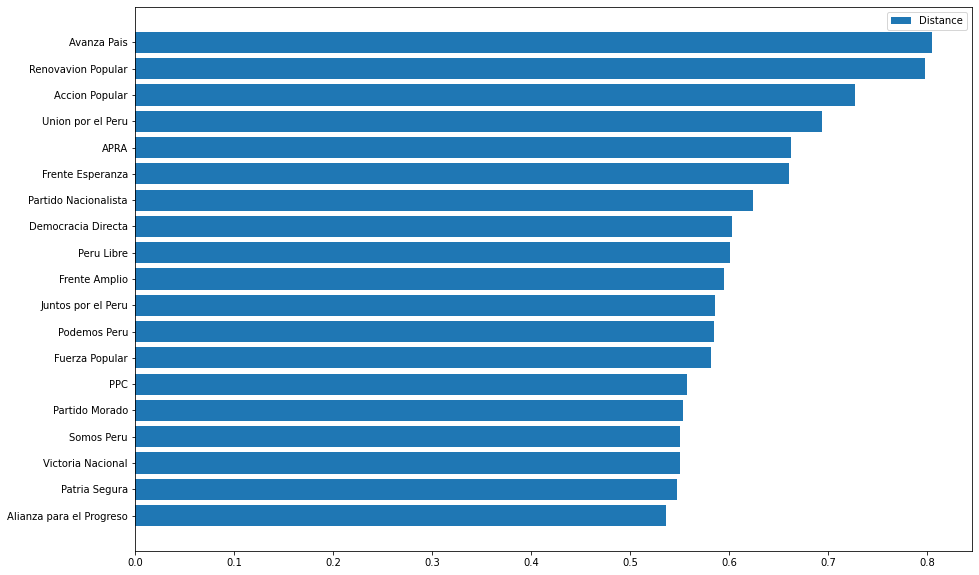

In [83]:
from matplotlib import style
fig = plt.figure(figsize=[15,10])
data = df.sort_values('JaroW_Dictance')#.plot(x='Id_PG1',kind='barh', rot=0, label='Distance')
plt.barh(range(data.shape[0]), data['JaroW_Dictance'].values, label='Distance')
plt.yticks(range(data.shape[0]), data['Id_PG1'])
plt.legend()
plt.show()
fig.savefig('sim_plan_nacional.pdf', bbox_inches = 'tight', pad_inches = 0)

# Analisis por objetivos

In [23]:
data_file="ODS2030/objetivo1.txt"
objetivo1=setup(data_file)

data_file="ODS2030/objetivo2.txt"
objetivo2=setup(data_file)

data_file="ODS2030/objetivo3.txt"
objetivo3=setup(data_file)

data_file="ODS2030/objetivo4.txt"
objetivo4=setup(data_file)

data_file="ODS2030/objetivo5.txt"
objetivo5=setup(data_file)

data_file="ODS2030/objetivo6.txt"
objetivo6=setup(data_file)

data_file="ODS2030/objetivo7.txt"
objetivo7=setup(data_file)

data_file="ODS2030/objetivo8.txt"
objetivo8=setup(data_file)

data_file="ODS2030/objetivo9.txt"
objetivo9=setup(data_file)

data_file="ODS2030/objetivo10.txt"
objetivo10=setup(data_file)

data_file="ODS2030/objetivo11.txt"
objetivo11=setup(data_file)

data_file="ODS2030/objetivo12.txt"
objetivo12=setup(data_file)

data_file="ODS2030/objetivo13.txt"
objetivo13=setup(data_file)

data_file="ODS2030/objetivo14.txt"
objetivo14=setup(data_file)

data_file="ODS2030/objetivo15.txt"
objetivo15=setup(data_file)

data_file="ODS2030/objetivo16.txt"
objetivo16=setup(data_file)

data_file="ODS2030/objetivo17.txt"
objetivo17=setup(data_file)

2021-03-19 16:56:33,813 : INFO : reading file ODS2030/objetivo1.txt...this may take a while
2021-03-19 16:56:33,815 : INFO : read 0 reviews
2021-03-19 16:56:33,817 : INFO : Done reading data file
2021-03-19 16:56:33,923 : INFO : reading file ODS2030/objetivo2.txt...this may take a while
2021-03-19 16:56:33,924 : INFO : read 0 reviews
2021-03-19 16:56:33,925 : INFO : Done reading data file
2021-03-19 16:56:34,016 : INFO : reading file ODS2030/objetivo3.txt...this may take a while
2021-03-19 16:56:34,017 : INFO : read 0 reviews
2021-03-19 16:56:34,018 : INFO : Done reading data file
2021-03-19 16:56:34,111 : INFO : reading file ODS2030/objetivo4.txt...this may take a while
2021-03-19 16:56:34,111 : INFO : read 0 reviews
2021-03-19 16:56:34,113 : INFO : Done reading data file
2021-03-19 16:56:34,213 : INFO : reading file ODS2030/objetivo5.txt...this may take a while
2021-03-19 16:56:34,214 : INFO : read 0 reviews
2021-03-19 16:56:34,215 : INFO : Done reading data file
2021-03-19 16:56:34,

In [24]:
Corpus_ods=[]
Corpus_ods.append([objetivo1])
Corpus_ods.append([objetivo2])
Corpus_ods.append([objetivo3])
Corpus_ods.append([objetivo4])
Corpus_ods.append([objetivo5])
Corpus_ods.append([objetivo6])
Corpus_ods.append([objetivo7])
Corpus_ods.append([objetivo8])
Corpus_ods.append([objetivo9])
Corpus_ods.append([objetivo10])
Corpus_ods.append([objetivo11])
Corpus_ods.append([objetivo12])
Corpus_ods.append([objetivo13])
Corpus_ods.append([objetivo14])
Corpus_ods.append([objetivo15])
Corpus_ods.append([objetivo16])
Corpus_ods.append([objetivo17])


In [25]:
titulo_objetivos=["FIN DE LA POBREZA","HAMBRE CERO","SALUD Y BIENESTAR","EDUCACION DE CALIDAD","IGUALDAD DE GENERO","AGUA LIMPIA Y SANEAMIENTO","ENERGIA ASEQUIBLE Y NO CONTAMINANTE","TRABAJO DECENTE Y CRECIMIENTO ECONOMICO","INDUSTRIA INNOVACION E INFREESTRUCTURA","REDUCCION DE LAS DESIGUALDADES","CIUDADES Y COMUNIDADES SOSTENIBLES","PRODUCCION Y CONSUMO RESPONSABLES","ACCION POR EL CLIMA","VIDA SUBMARINA","VIDA DE ECOSISTEMAS TERRESTRES","PAZ JUSTICIA E INSTITUCIONES SOLIDAS","ALIANZAS PARA LOGRAR LOS OBJETIVOS"]

In [ ]:
c=0
cadena=[]
for p in Corpus:
    #for i in p:
    x=0
    cadena.append(NombreP[c])
    for ods in Corpus_ods:
            #for j in case:
            s1 = " ".join([str(k) for k in Corpus[c]])
            s2 = " ".join([str(g) for g in Corpus_ods[x]])
            #print(s1)
            #print(s2)
            # Prjaro Similarity of two s 
            d=round(jaro_distance(s1, s2),6)
            #cadena.append(titulo_objetivos[x])
            cadena.append(d)
            #print(cadena)
            #print(NombreP[c]," con ",titulo_objetivos[x], "similitud = ", d)
            x=x+1
    c=c+1

In [ ]:
import csv
with open('Planes_objetivos.csv', 'w') as csvfile:
    fieldnames = ["PARTIDO","FIN DE LA POBREZA","HAMBRE CERO","SALUD Y BIENESTAR","EDUCACION DE CALIDAD","IGUALDAD DE GENERO","AGUA LIMPIA Y SANEAMIENTO","ENERGIA ASEQUIBLE Y NO CONTAMINANTE","TRABAJO DECENTE Y CRECIMIENTO ECONOMICO","INDUSTRIA INNOVACION E INFREESTRUCTURA","REDUCCION DE LAS DESIGUALDADES","CIUDADES Y COMUNIDADES SOSTENIBLES","PRODUCCION Y CONSUMO RESPONSABLES","ACCION POR EL CLIMA","VIDA SUBMARINA","VIDA DE ECOSISTEMAS TERRESTRES","PAZ JUSTICIA E INSTITUCIONES SOLIDAS","ALIANZAS PARA LOGRAR LOS OBJETIVOS"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    word=0
    for i in range(int(len(cadena)/18)):
        
        Field1=cadena[word]
        Field2=cadena[word+1]
        Field3=cadena[word+2]
        Field4=cadena[word+3]
        Field5=cadena[word+4]
        Field6=cadena[word+5]
        Field7=cadena[word+6]
        Field8=cadena[word+7]
        Field9=cadena[word+8]
        Field10=cadena[word+9]
        Field11=cadena[word+10]
        Field12=cadena[word+11]
        Field13=cadena[word+12]
        Field14=cadena[word+13]
        Field15=cadena[word+14]
        Field16=cadena[word+15]
        Field17=cadena[word+16]
        Field18=cadena[word+17]
        
        writer.writerow({"PARTIDO":Field1,
            "FIN DE LA POBREZA":Field2,
            "HAMBRE CERO":Field3,
            "SALUD Y BIENESTAR":Field4,
            "EDUCACION DE CALIDAD":Field5,
            "IGUALDAD DE GENERO":Field6,
            "AGUA LIMPIA Y SANEAMIENTO":Field7,
            "ENERGIA ASEQUIBLE Y NO CONTAMINANTE":Field8,
            "TRABAJO DECENTE Y CRECIMIENTO ECONOMICO":Field9,
            "INDUSTRIA INNOVACION E INFREESTRUCTURA":Field10,
            "REDUCCION DE LAS DESIGUALDADES":Field11,
            "CIUDADES Y COMUNIDADES SOSTENIBLES":Field12,
            "PRODUCCION Y CONSUMO RESPONSABLES":Field13,
            "ACCION POR EL CLIMA":Field14,
            "VIDA SUBMARINA":Field15,
            "VIDA DE ECOSISTEMAS TERRESTRES":Field16,
            "PAZ JUSTICIA E INSTITUCIONES SOLIDAS":Field17,
            "ALIANZAS PARA LOGRAR LOS OBJETIVOS":Field18 })
        cont=word+17
        word=cont+1

In [87]:
#Planes_objetivos.csv
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Planes_objetivos.csv") 
df

,PARTIDO,FIN DE LA POBREZA,HAMBRE CERO,SALUD Y BIENESTAR,EDUCACION DE CALIDAD,IGUALDAD DE GENERO,AGUA LIMPIA Y SANEAMIENTO,ENERGIA ASEQUIBLE Y NO CONTAMINANTE,TRABAJO DECENTE Y CRECIMIENTO ECONOMICO,INDUSTRIA INNOVACION E INFREESTRUCTURA,REDUCCION DE LAS DESIGUALDADES,CIUDADES Y COMUNIDADES SOSTENIBLES,PRODUCCION Y CONSUMO RESPONSABLES,ACCION POR EL CLIMA,VIDA SUBMARINA,VIDA DE ECOSISTEMAS TERRESTRES,PAZ JUSTICIA E INSTITUCIONES SOLIDAS,ALIANZAS PARA LOGRAR LOS OBJETIVOS
0,Accion Popular,0.555559,0.554199,0.553368,0.555608,0.549025,0.547367,0.525703,0.565293,0.557990,0.552846,0.601456,0.580084,0.539659,0.533725,0.565107,0.616417,0.559488
1,Partido Morado,0.519155,0.518640,0.519289,0.518879,0.517777,0.518530,0.514310,0.522165,0.520495,0.518212,0.528129,0.523880,0.516286,0.514481,0.521088,0.531548,0.519432
2,Avanza Pais,0.579530,0.577751,0.576366,0.577912,0.570799,0.565314,0.532902,0.594903,0.583255,0.575454,0.651993,0.616676,0.556407,0.544366,0.594914,0.673844,0.586940
3,Alianza para el Progreso,0.515593,0.516515,0.516885,0.515212,0.515610,0.514345,0.513745,0.517060,0.516861,0.516594,0.521085,0.518751,0.514990,0.513978,0.516947,0.523400,0.516501
4,APRA,0.542002,0.540479,0.540778,0.540395,0.537585,0.534210,0.520654,0.548867,0.543897,0.539599,0.573924,0.559385,0.530776,0.526028,0.548046,0.584490,0.544538
5,Democracia Directa,0.530334,0.528141,0.528825,0.528685,0.527176,0.526086,0.517471,0.532894,0.531593,0.528706,0.550331,0.539180,0.524426,0.520569,0.533590,0.555673,0.530502
6,Frente Amplio,0.528551,0.527524,0.526756,0.526993,0.525213,0.523541,0.514430,0.531520,0.528735,0.527114,0.545651,0.537251,0.522602,0.518781,0.530830,0.552034,0.529612
7,Frente Esperanza,0.542343,0.540257,0.539541,0.540447,0.537679,0.534673,0.521726,0.547905,0.541909,0.539226,0.572902,0.557793,0.530555,0.526241,0.547175,0.584065,0.544031
8,Fuerza Popular,0.525340,0.524808,0.524703,0.525313,0.523504,0.523189,0.516332,0.527491,0.524811,0.524665,0.540765,0.533146,0.520259,0.519048,0.527942,0.545600,0.527611
9,Juntos por el Peru,0.526124,0.525115,0.525678,0.525628,0.523453,0.522863,0.514821,0.529263,0.527332,0.525108,0.542402,0.532916,0.520900,0.518414,0.529129,0.547104,0.527666


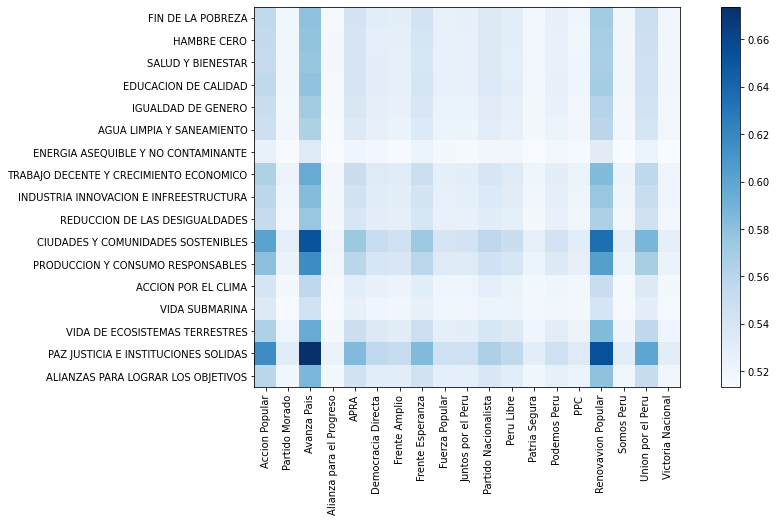

In [99]:
fig = plt.figure(figsize=[15,7])
cmap_ = 'Blues'
plt.imshow(df.drop('PARTIDO', axis=1).values.T, cmap=cmap_)
plt.xticks(range(df.shape[0]), df['PARTIDO'], rotation=90)
plt.yticks(range(df.drop('PARTIDO', axis=1).shape[1]), df.drop('PARTIDO', axis=1).columns)
plt.colorbar()
plt.show()
fig.savefig('sim_planes_obj.pdf', bbox_inches = 'tight', pad_inches = 0)

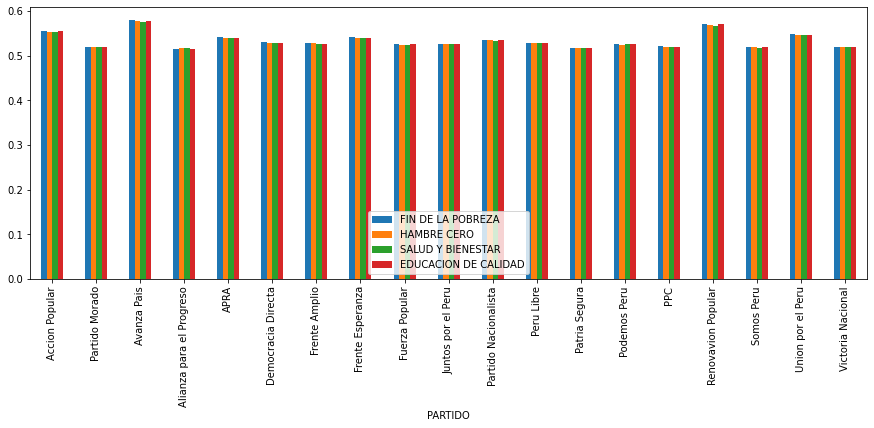

In [85]:
from matplotlib import style
df.plot(x="PARTIDO", y=["FIN DE LA POBREZA","HAMBRE CERO","SALUD Y BIENESTAR","EDUCACION DE CALIDAD"],figsize=(15, 5), kind="bar")
plt.show()

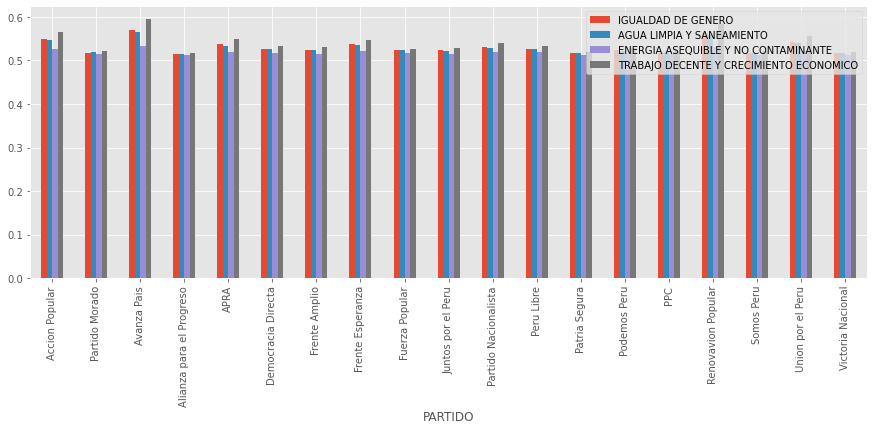

In [31]:
from matplotlib import style
df.plot(x="PARTIDO", y=["IGUALDAD DE GENERO","AGUA LIMPIA Y SANEAMIENTO","ENERGIA ASEQUIBLE Y NO CONTAMINANTE","TRABAJO DECENTE Y CRECIMIENTO ECONOMICO"],figsize=(15, 5), kind="bar")
plt.show()

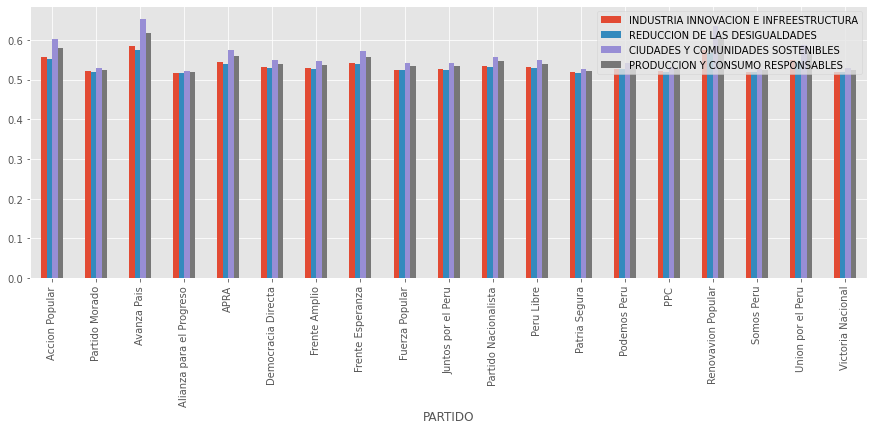

In [32]:

df.plot(x="PARTIDO", y=["INDUSTRIA INNOVACION E INFREESTRUCTURA","REDUCCION DE LAS DESIGUALDADES","CIUDADES Y COMUNIDADES SOSTENIBLES","PRODUCCION Y CONSUMO RESPONSABLES"],figsize=(15, 5), kind="bar")
plt.show()

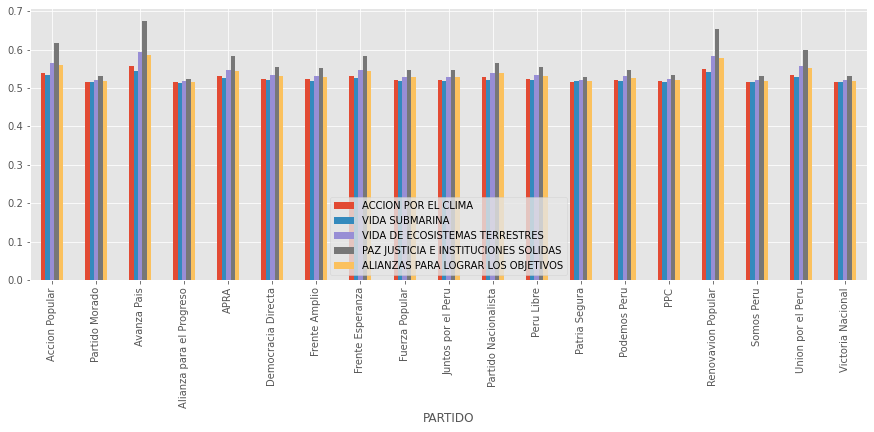

In [39]:


df.plot(x="PARTIDO", y=["ACCION POR EL CLIMA","VIDA SUBMARINA","VIDA DE ECOSISTEMAS TERRESTRES","PAZ JUSTICIA E INSTITUCIONES SOLIDAS","ALIANZAS PARA LOGRAR LOS OBJETIVOS"],figsize=(15, 5), kind="bar")
plt.show()